https://github.com/HevLfreis/TrafficLight-Detector
  
  

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def detect(file):
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.imread(file)
    cimg = img
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # color range
    lower_red1 = np.array([0,100,100])
    upper_red1 = np.array([10,255,255])
    lower_red2 = np.array([160,100,100])
    upper_red2 = np.array([180,255,255])
    lower_green = np.array([40,50,50])
    upper_green = np.array([90,255,255])
    # lower_yellow = np.array([15,100,100])
    # upper_yellow = np.array([35,255,255])
    lower_yellow = np.array([15,150,150])
    upper_yellow = np.array([35,255,255])
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    maskg = cv2.inRange(hsv, lower_green, upper_green)
    masky = cv2.inRange(hsv, lower_yellow, upper_yellow)
    maskr = cv2.add(mask1, mask2)

    size = img.shape
    # print size

    # hough circle detect
    r_circles = cv2.HoughCircles(maskr, cv2.HOUGH_GRADIENT, 1, 80,
                               param1=50, param2=10, minRadius=0, maxRadius=30)

    g_circles = cv2.HoughCircles(maskg, cv2.HOUGH_GRADIENT, 1, 60,
                                 param1=50, param2=10, minRadius=0, maxRadius=30)

    y_circles = cv2.HoughCircles(masky, cv2.HOUGH_GRADIENT, 1, 30,
                                 param1=50, param2=5, minRadius=0, maxRadius=30)

    # traffic light detect
    r = 5
    bound = 4.0 / 10
    if r_circles is not None:
        r_circles = np.uint16(np.around(r_circles))

        for i in r_circles[0, :]:
            if i[0] > size[1] or i[1] > size[0]or i[1] > size[0]*bound:
                continue

            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):

                    if (i[1]+m) >= size[0] or (i[0]+n) >= size[1]:
                        continue
                    h += maskr[i[1]+m, i[0]+n]
                    s += 1
            if h / s > 50:
                cv2.circle(cimg, (i[0], i[1]), i[2]+10, (0, 255, 0), 2)
                cv2.circle(maskr, (i[0], i[1]), i[2]+30, (255, 255, 255), 2)
                cv2.putText(cimg,'RED',(i[0], i[1]), font, 1,(255,0,0),2,cv2.LINE_AA)

    if g_circles is not None:
        g_circles = np.uint16(np.around(g_circles))

        for i in g_circles[0, :]:
            if i[0] > size[1] or i[1] > size[0] or i[1] > size[0]*bound:
                continue

            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):

                    if (i[1]+m) >= size[0] or (i[0]+n) >= size[1]:
                        continue
                    h += maskg[i[1]+m, i[0]+n]
                    s += 1
            if h / s > 100:
                cv2.circle(cimg, (i[0], i[1]), i[2]+10, (0, 255, 0), 2)
                cv2.circle(maskg, (i[0], i[1]), i[2]+30, (255, 255, 255), 2)
                cv2.putText(cimg,'GREEN',(i[0], i[1]), font, 1,(255,0,0),2,cv2.LINE_AA)

    if y_circles is not None:
        y_circles = np.uint16(np.around(y_circles))

        for i in y_circles[0, :]:
            if i[0] > size[1] or i[1] > size[0] or i[1] > size[0]*bound:
                continue

            h, s = 0.0, 0.0
            for m in range(-r, r):
                for n in range(-r, r):

                    if (i[1]+m) >= size[0] or (i[0]+n) >= size[1]:
                        continue
                    h += masky[i[1]+m, i[0]+n]
                    s += 1
            if h / s > 50:
                cv2.circle(cimg, (i[0], i[1]), i[2]+10, (0, 255, 0), 2)
                cv2.circle(masky, (i[0], i[1]), i[2]+30, (255, 255, 255), 2)
                cv2.putText(cimg,'YELLOW',(i[0], i[1]), font, 1,(255,0,0),2,cv2.LINE_AA)
    
    
    plt.imshow(cimg)

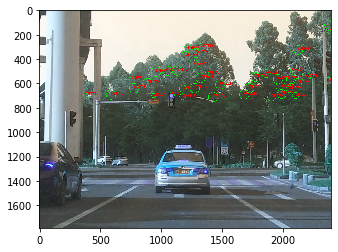

In [8]:
detect('daxue.jpg')